<a href="https://colab.research.google.com/github/sheikh-bah/Deep_NN_-_CNN/blob/main/cat_dog_image_improving_deep_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  

--2021-03-06 22:23:52--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   110MB/s    in 0.6s    

2021-03-06 22:23:53 (110 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# extract our zip file
local_zip ='/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = ('/tmp/cats_and_dogs_filtered')
# Drirectory with our training and validation data
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')


# Directory with our training cats and dogs picture
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with our validation cats and dogs picture
test_dogs_dir = os.path.join(test_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')


# Build our model

Let's start with a model that's very effective at learning Cats v Dogs.

Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3), input_shape = (150,150,3),activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # second layer
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # third layer
                                    tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #fourth layer
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the input in the Dense
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')

                              
])

# compile the model

In [ ]:
model.compile(optimizer=RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

# image preprocessing

In [ ]:
# Normalize image
train_datagen = ImageDataGenerator(rescale= 1/ 255)
test_datagen = ImageDataGenerator(rescale= 1/ 255)
# data generator allows us to instantiate generators and their labels
train_generator = train_datagen.flow_from_directory(
                         train_dir,
                         target_size = (150, 150),
                         batch_size = 20,
                         class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
                         test_dir,
                         target_size = (150, 150),
                         batch_size = 20,
                         class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Train our model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 50,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps= 25,
    verbose = 2

)

Epoch 1/100
50/50 - 54s - loss: 0.8484 - accuracy: 0.5000 - val_loss: 0.6905 - val_accuracy: 0.5440
Epoch 2/100
50/50 - 51s - loss: 0.7061 - accuracy: 0.5170 - val_loss: 0.6945 - val_accuracy: 0.4780
Epoch 3/100
50/50 - 52s - loss: 0.7068 - accuracy: 0.5450 - val_loss: 1.5932 - val_accuracy: 0.5080
Epoch 4/100
50/50 - 52s - loss: 0.6838 - accuracy: 0.6040 - val_loss: 0.8100 - val_accuracy: 0.5280
Epoch 5/100
50/50 - 52s - loss: 0.6296 - accuracy: 0.6520 - val_loss: 1.8466 - val_accuracy: 0.4940
Epoch 6/100
50/50 - 52s - loss: 0.6654 - accuracy: 0.6550 - val_loss: 0.5829 - val_accuracy: 0.6840
Epoch 7/100
50/50 - 58s - loss: 0.5877 - accuracy: 0.7070 - val_loss: 0.5762 - val_accuracy: 0.6980
Epoch 8/100
50/50 - 53s - loss: 0.5759 - accuracy: 0.7020 - val_loss: 0.6100 - val_accuracy: 0.6900
Epoch 9/100
50/50 - 52s - loss: 0.5080 - accuracy: 0.7570 - val_loss: 0.6334 - val_accuracy: 0.6160
Epoch 10/100
50/50 - 52s - loss: 0.5175 - accuracy: 0.7460 - val_loss: 0.6443 - val_accuracy: 0.6620

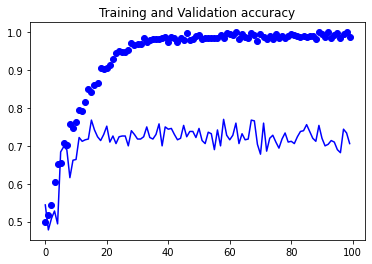

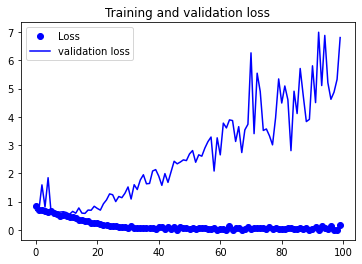

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Improving deep neural network using Image Augmentation

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

In [ ]:
local_zip = ('/tmp/cats_and_dogs_filtered.zip')
zip_ref =zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp') 
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

cats_train_dir = os.path.join(train_dir, 'cats')
dogs_train_dir = os.path.join(train_dir, 'dogs')


cats_test_dir = os.path.join(test_dir, 'cats')
dogs_test_dir = os.path.join(test_dir, 'dogs')

# Build the model

In [ ]:
model = tf.keras.models.Sequential([
                                    # Firstlayer
                                  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150, 3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  # second layer
                                  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  # third layer
                                  tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  # fourth layer
                                  tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  # flatten
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation = 'relu'),
                                  tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [ ]:
history = model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr= 1e-4), metrics = ['accuracy'] )

In [ ]:
# Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest' )

test_datagen = ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary'
)
 # Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
                     test_dir, target_size = (150,150),
                     batch_size = 20,
                     class_mode ='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, steps_per_epoch = 100,epochs = 100,
                    validation_data = validation_generator, validation_steps = 50,verbose = 2 )

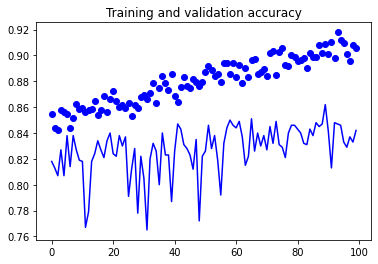

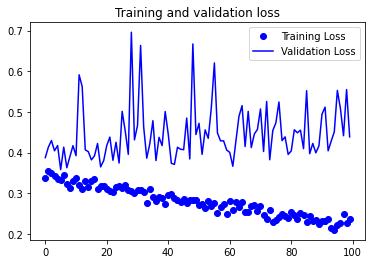

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,'bo', label ='Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()

# Improving deep neural network using Drop out regularization

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
cats_train_dir = os.path.join(train_dir, 'cats')
dogs_train_dir = os.path.join(train_dir, 'dogs')
validation_dir = os.path.join(base_dir, 'validation')
cats_validation_dir = os.path.join(validation_dir, 'cats')
dogs_validation_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape = (150,150,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode ='nearest'

    )

validation_datagen = ImageDataGenerator(rescale = 1/255)



training_generator = train_datagen.flow_from_directory(
                      train_dir,
                      batch_size = 20,
                      target_size = (150,150),
                      class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
                       test_dir,
                       batch_size = 20,
                       target_size = (150,150),
                       class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    training_generator,
    steps_per_epoch = 100,
    epochs= 100,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose =2
)

Epoch 1/100
100/100 - 113s - loss: 0.6939 - accuracy: 0.5515 - val_loss: 0.6957 - val_accuracy: 0.4990
Epoch 2/100
100/100 - 112s - loss: 0.6793 - accuracy: 0.5970 - val_loss: 0.6407 - val_accuracy: 0.6570
Epoch 3/100
100/100 - 113s - loss: 0.6703 - accuracy: 0.6055 - val_loss: 0.6035 - val_accuracy: 0.6620
Epoch 4/100
100/100 - 114s - loss: 0.6502 - accuracy: 0.6250 - val_loss: 0.6369 - val_accuracy: 0.6060
Epoch 5/100
100/100 - 113s - loss: 0.6510 - accuracy: 0.6300 - val_loss: 0.7174 - val_accuracy: 0.6190
Epoch 6/100
100/100 - 112s - loss: 0.6359 - accuracy: 0.6450 - val_loss: 0.5871 - val_accuracy: 0.6770
Epoch 7/100
100/100 - 112s - loss: 0.6276 - accuracy: 0.6670 - val_loss: 0.5718 - val_accuracy: 0.6840
Epoch 8/100
100/100 - 113s - loss: 0.6277 - accuracy: 0.6620 - val_loss: 0.5954 - val_accuracy: 0.6860
Epoch 9/100
100/100 - 113s - loss: 0.6191 - accuracy: 0.6685 - val_loss: 0.5777 - val_accuracy: 0.7060
Epoch 10/100
100/100 - 112s - loss: 0.5975 - accuracy: 0.6845 - val_loss:

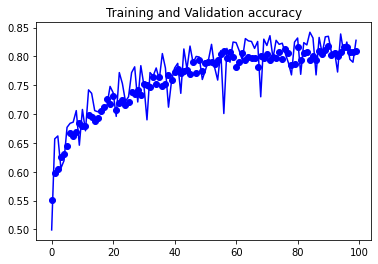

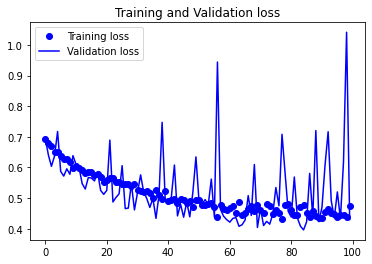

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label ='Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()
